# Text Procesing Analisys:

The purpose of this notebook is documenting the process of extract information from the text of the database. 

This is the 6th notebook, so it is building on top of the cleaning, processing,  EDA.

The main tasks conducted in this notebook are:
* extract important features and trends from the text;


## Load database

In [1]:
#REquired libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# To load a file into colab:
import io
import os
from datetime import datetime

# For the plots:
import matplotlib.pyplot       as plt
import seaborn                 as sns
import plotly.express as px
import plotly.graph_objs as go
import time

In [2]:
import nltk # imports the natural language toolkit
from nltk.stem import PorterStemmer 
from nltk.util import ngrams
nltk.download('punkt')
import string
import plotly
import re
from collections import Counter
from pylab import rcParams
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Pickle Files into Jupyter


In [ ]:
%%time
# To save as Pickle format:
bdf.to_pickle("./placetopayDB3_pickle")

In [ ]:
%%time
#And then when you need to restart your notebook you can simply read directly from pickle:
bd = pd.read_pickle("./placetopayDB3_pickle")
# If the file is very large the pickle file will be compressed with the parameter compression = 'gzip'.

### Pickle files into Google Drive:

In [3]:
from google.colab import drive
import pickle
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%%time
DATA_PATH = "/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/placetopayDB4_pickle"
infile = open(DATA_PATH,'rb')
bd = pickle.load(infile)
bd.shape

CPU times: user 8.82 s, sys: 3.46 s, total: 12.3 s
Wall time: 34.6 s


### CSV into jupyter from local folder:

In [ ]:
cd ../Inferencia y recomendacion - EGM

/home/jovyan/work/PROJECT/Inferencia y recomendacion - EGM


In [ ]:
ls

 1-Documentos/                   'Copy of Team67_Project_Week5.ipynb'
'2-Deliverable Documents Sent'/   EDA.ipynb
'3- EDA Notebooks'/               merchants.csv
'4-Similarity Matrix'/            merchants.gsheet
'Base Limpia .ipynb'              payers.csv
 bdfn.csv                         payers.gsheet
 bdfnv2.csv                       placetopayDB3.ftr
'Borrador - LuisM.ipynb'          PlaceToPayEDA.html


In [ ]:
%%time
FileName = 'placetopayDB3.csv'
from csv import reader
opened_file = open(FileName) # File path if it fails it might be necessary to add encoding = "utf-8"
read_file = reader(opened_file,delimiter=',')
read_file

In [ ]:
Sample = pd.read_csv( FileName, nrows = 10) # just to check schema is as expected. Use sep=',', error_bad_lines=False, encoding='latin1', nrows = 100000

### CSV into colab from Google Drive:

In [ ]:
# Para usar Google Drive, (Solo si se ejecuta desde Google Drive):
from google.colab import drive
drive.mount('/content/drive')

# after that:
# <--- Refresh mounted Drive
# <--- Look for file and get the path link

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FilePath = '/content/drive/My Drive/DS4A-3a/Place to pay - DS4A - Databases and Notebooks/bdfn.csv'
Sample = pd.read_csv(FilePath, nrows = 10) # just to check schema is as expected. Use sep=',', error_bad_lines=False, encoding='latin1', nrows = 100000

In [ ]:
Sample.shape

In [ ]:
%%time
# Load the database to start exploratory analysis:
#FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/bdfn.csv'
FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/placetopayDB4_sample.csv'

DataChunk = pd.read_csv(FilePath, chunksize=100000, sep=',', encoding='utf-8')#, usecols = All_cols) 
dfList = []
for chunk in DataChunk:
    df = pd.DataFrame(chunk)
    dfList.append(df)
    print(chunk.shape, type(chunk))
    del chunk                       # You have to liberate memory, otherwise, it will crash the kernel
bd = pd.concat(dfList,sort=False)   # You can also convert to dataframe and process inside the for loop.
del DataChunk                       # You have to liberate memory, otherwise, it will crash the kernel%%time
# Dataset is now stored in a Pandas Dataframe

(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
(100000, 32) <class 'pandas.core.frame.DataFrame'>
CPU times: user 10.3 s, sys: 947 ms, total: 11.2 s
Wall time: 16.2 s


### Feather file into Jupyter

In [ ]:
%%time
import feather
FeatherFileName = '/placetopayDB3.ftr'

# To read feather-format:
bd = pd.read_feather(FeatherFilePath + FeatherFileName, columns=None, use_threads=True)
#bd = feather.read_dataframe(FilePath) # do the same, alternatively

In [ ]:
# Load the database to start exploratory analysis:
%%time
FileName = 'placetopayDB3.csv'
ChunkSize = 10 ** 5

#https://pythonspeed.com/articles/chunking-pandas/
#for chunk in pd.read_csv(FileName, chunksize=ChunkSize):
#    process(chunk)

DataChunk = pd.read_csv(FileName, chunksize=100000, sep=',', encoding='utf-8', usecols = chosen_cols) 
dfList = []
for chunk in DataChunk:
    dfList.append(chunk)
    print(chunk.shape, type(chunk))
    del chunk                       # You have to liberate memory, otherwise, it will crash the kernel
bd = pd.concat(dfList,sort=False)   # You can also convert to dataframe and process inside the for loop.
del DataChunk                       # You have to liberate memory, otherwise, it will crash the kernel%%time
# Dataset is now stored in a Pandas Dataframe



---



---



# Processing descriptions 

The goal is to have an easy to use dataframe where we can have how many of the descriptions are used, by how many merchants and by how many payers.



In [5]:
# Just the columns we need:
bd = bd[['transaction_id', 'transaction_description', 'merchant_id', 'transaction_payer_id', 'isic_division_name', 'isic_section_name','transaction_processing_date_',"transaction_processing_amount", 'transaction_response_code']]

In [6]:
bd['merchant_id'] = bd['merchant_id'].astype(str)
bd['isic_division_name'] = bd['isic_division_name'].astype(str)
bd['isic_section_name'] = bd['isic_section_name'].astype(str)
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9738799 entries, 3287293 to 2807550
Data columns (total 9 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   transaction_id                 object        
 1   transaction_description        object        
 2   merchant_id                    object        
 3   transaction_payer_id           object        
 4   isic_division_name             object        
 5   isic_section_name              object        
 6   transaction_processing_date_   datetime64[ns]
 7   transaction_processing_amount  float64       
 8   transaction_response_code      category      
dtypes: category(1), datetime64[ns](1), float64(1), object(6)
memory usage: 678.0+ MB


In [7]:
# Drop all NaN / Null descriptions
bd.drop(bd[bd['transaction_description'].isna()].index, inplace = True)

In [8]:
bd.shape

(8900952, 9)

In [ ]:
Descriptions = bd['transaction_description'].value_counts()
Descriptions

Pago Polizas Financiadas    732556
PAGO IMPUESTO VEHICULAR     513430
Pago Seguros de vida        493233
Pago EPS                    383471
SOAT                        355218
                             ...  
76205273715                      1
58403279/60736316 Galile         1
1569662                          1
76210416730                      1
76210519104                      1
Name: transaction_description, Length: 1841281, dtype: int64

In [ ]:
Descriptions.index.apply(lambda x: nltk.word_tokenize(x))

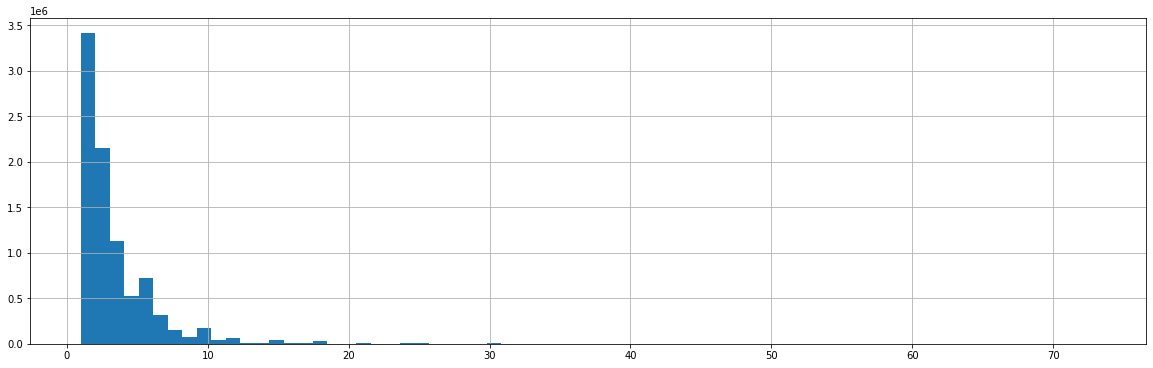

In [ ]:
# Number of words in ALL THE DESCRIPTIONS (9 millions of descriptions)

from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
Descriptions.length.hist(bins = 70)

In [ ]:
%%time
bd[bd['transaction_description']=='Pago Polizas Financiadas']['merchant_id'].value_counts()

CPU times: user 2.16 s, sys: 6 ms, total: 2.17 s
Wall time: 2.17 s


CO0000000598    732556
Name: merchant_id, dtype: int64

In [ ]:
%%time
bd[bd['transaction_description']=='Pago Polizas Financiadas'].groupby(['merchant_id']).count()

CPU times: user 1.34 s, sys: 7 ms, total: 1.35 s
Wall time: 1.35 s


,transaction_id,transaction_description,transaction_payer_id
merchant_id,,,
CO0000000598,732556,732556,732556


In [ ]:
# Calculate how many merchants use a particular description
%%time
MerchSeries = []
PayerSeries = []
for description in TokenDescriptions.index:
  MerchSeries.append(len(bd[bd['transaction_description']==description]['merchant_id'].value_counts()))
  PayerSeries.append(len(bd[bd['transaction_description']==description]['transaction_payer_id'].value_counts()))
len(MerchSeries)

11721

As the function is very slow, we get the first 11000 descriptions and proceed to impute values on the rest

In [ ]:
bd[bd['transaction_description']==bd.iloc]

In [ ]:
pd.DataFrame({'a': MerchSeries[:-1], 'b': PayerSeries}).tail(5000).quantile([.97, .99, .999, 1])

,a,b
0.970,1.000,17.0
0.990,1.000,19.0
0.999,3.001,20.0
1.000,5.000,20.0


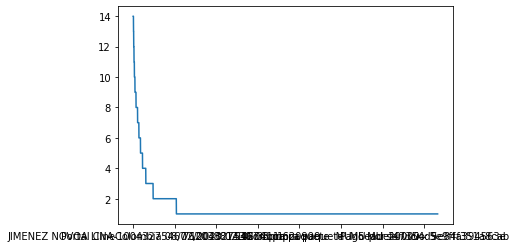

In [ ]:
TokenDescriptions.tail(1831000).plot()

In [ ]:
# Calculate how many merchants use a particular description, from index 11720 to the end of table
%%time
MerchSeries = []
PayerSeries = []
for description in range(11720, len(Descriptions.index), 1):
  MerchSeries.append(len(bd[bd['transaction_description']==description].groupby(['merchant_id']).count()))
  PayerSeries.append(len(bd[bd['transaction_description']==description].groupby(['transaction_payer_id']).count()))
len(MerchSeries)

11721

In [ ]:
Descriptions = pd.concat([TokenDescriptions.reset_index(), pd.DataFrame({'a': MerchSeries[:-1], 'b': PayerSeries})], axis = 1)
Descriptions.rename(columns = {'index': 'Text', 'transaction_description':'No_of_transactions', 'a':'No of Merchants', 'b': 'No of Payers'}, inplace = True)

In [ ]:
Descriptions['No of Merchants'].fillna(value = 1, inplace = True)
Descriptions['No of Payers'].fillna(value = 5, inplace = True)

## Individual keywords

Here we can see that the descriptions have various keywords that maybe are not that common in the spanish Natural Language Processing libraries.

So, it is needed some domain expertise to select the keywords to look for.

Clearly, the database provide lots of information (sometimes very sensitive) about users and merchants. From that information it is possible to assign tags to each individual user flagging if they have bought some specific category of products of interest.

For expample, if they have consumed products described as "poliza", "vehiculo" and "impuesto" it is very possible that the user has a car. 

The next are some examples:

In [ ]:
# Descriptions with "vehiculo" token:

Substring = "ehícul"
DescList = [each for each in Descriptions.Text if Substring in each]
print('Number of descriptions: ',len(DescList))
DescList[:20]

# for printing only the boundaies of the substring of interest:
#for desc in DescList[:20]:
    #good_index = desc.find(Substring)
    #print(desc[good_index-20:good_index+20].replace("\n", ""))

Number of descriptions:  812


['Impuesto Vehícular',
 'Pago de trámite entrega de vehículo',
 'Pago impuesto vehículo PLACA GVN282',
 'Pago impuesto vehículo PLACA HEY812',
 'Pago impuesto vehículo PLACA OWT89C',
 'Pago impuesto vehículo PLACA IOT403',
 'Pago impuesto vehículo PLACA LAH254',
 'Pago impuesto vehículo PLACA IOS695',
 'Pago impuesto vehículo PLACA FJC99D',
 'Pago impuesto vehículo PLACA RZG73E',
 'Pago impuesto vehículo PLACA DST084',
 'Pago impuesto vehículo PLACA IYP114',
 'Pago impuesto vehículo PLACA KHL902',
 'Pago impuesto vehículo PLACA EKS311',
 'Pago impuesto vehículo PLACA DFU598',
 'Pago impuesto vehículo PLACA OXX54C',
 'Pago impuesto vehículo PLACA ENX666',
 'Pago impuesto vehículo PLACA MSY38E',
 'Pago impuesto vehículo PLACA JVL63E',
 'Pago impuesto vehículo PLACA QVN86E']

In [ ]:
# Descriptions with "poliza" token:

Substring = "oliza"
DescList = [each for each in Descriptions.Text if Substring in each]
print('Number of descriptions: ',len(DescList))
DescList[:20]

Number of descriptions:  1009


['Pago Polizas Financiadas',
 'Cliente antiguo realiza el pago de 1 vigencia de sus polizas',
 'pago polizas',
 'pago polizas (1 vigencia)',
 'pago poliza',
 'Cliente antiguo realiza el pago de 2 vigencia de sus polizas',
 'cliente antiguo realiza pago por 1 vigencia de las polizas 5672353',
 'Cliente antiguo Cliente antiguo realizo pago polizas 1596682 1596684 5697335 realiza pago de la vigencia de enero',
 'cliente antiguo pago 1 vigencia polizas 5649558,1803681',
 'pago polizas mes de diciembre-enero-febrero 1524863-1530871-1550188-1803102-5630424-5650709 (Cliente Antiguo)',
 'Pedido 15290 - Productos: Colchoneta Profesional FitHome,Kit Movimiento - Hombre,BELFAN Colágeno Hidrolizado Vainilla x 600g',
 'cliente antiguo realiza pago polizas 1589150,5689053,5689054 1 vigencia',
 'pago polizas 1486642  5690014  1326687',
 'pago polizas mes de enero y febrero (5650944-5650942) febrero y marzo (1550544-1550543) y marzo (1550542) Cliente Antiguo',
 'Pago polizas anuales 1561353-5679001-56

In [ ]:
# Descriptions with "impuesto" token:

Substring = "mpuesto"
DescList = [each for each in Descriptions.Text if Substring in each]
print('Number of descriptions: ',len(DescList))
DescList[:20]

Number of descriptions:  24086


['Impuesto predial',
 'Impuesto Vehícular',
 'Impuesto Predial Unificado',
 'Fac. de Pago Impuesto predial',
 'Impuesto telefonico',
 'Pago  de impuesto ICA. Alcaldia de Santiago de Cali.',
 'Pago impuesto vehículo PLACA GVN282',
 'Pago impuesto vehículo PLACA HEY812',
 'Pago impuesto vehículo PLACA OWT89C',
 'Pago impuesto vehículo PLACA IOT403',
 'Pago impuesto vehículo PLACA LAH254',
 'Pago impuesto vehículo PLACA IOS695',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000010601180039901202000002',
 'Pago impuesto vehículo PLACA FJC99D',
 'Pago impuesto vehículo PLACA RZG73E',
 'Pago impuesto vehículo PLACA DST084',
 'Pago impuesto vehículo PLACA IYP114',
 'taller fundamentos de impuestos',
 'Pago impuesto vehículo PLACA KHL902',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000000100030099000202000001']

In [ ]:
# Descriptions with "vuelo" token:

Substring = "uelo"
DescList = [each for each in Descriptions.Text if Substring in each]
print('Number of descriptions: ',len(DescList))
DescList[:20]

Number of descriptions:  85298


['vuelo mas hotel',
 '2248 La Finca del Abuelo, Sábado 23 de mayo de 2020, 16:00:00, General, Boleta familiar, número de tiquetes 1.',
 '2248 La Finca del Abuelo, Sábado 30 de mayo de 2020, 16:00:00, General, Boleta familiar, número de tiquetes 1.',
 '2248 La Finca del Abuelo, Sábado 06 de junio de 2020, 16:00:00, General, Boleta familiar, número de tiquetes 1.',
 'vuelo',
 'vuelos',
 '2248 La Finca del Abuelo, Sábado 06 de junio de 2020, 16:00:00, General, Promo Familiar, número de tiquetes 1.',
 'Reserva Vuelo Localizador: LXPMQC',
 'Vuelo',
 'Reserva Vuelo Localizador: 9NDZTA',
 'Vuelos - 52 - 2020-01-19(BOG a PUU) - OPFBDN',
 'Vuelos - 50 - 2020-01-19(BOG a CTG) - MTEHCB',
 'Vuelos - 52 - 2020-03-06(MDE a CLO) - IHUWUK',
 'Vuelos - 61 - 2020-01-24(BOG a CUC) - B3JHFI',
 'Vuelos - 50 - 2020-03-08(BOG a LIM) 2020-03-11(LIM a CUZ) 2020-03-17(CUZ a BOG) - QGTRLC',
 'Vuelos - 52 - 2020-01-17(BOG a PEI) 2020-01-17(PEI a BOG) - KQFVYT',
 'Vuelos - 45 - 2020-02-02(CTG a BOG) - G61ZBG',
 'V

In [ ]:
# Descriptions with "carro" token:

Substring = "carro"
DescList = [each for each in Descriptions.Text if Substring in each]
print('Number of descriptions: ',len(DescList))
DescList[:20]

Number of descriptions:  3


['Order #000012962 - javier_carron@hotmail.com',
 'Order #000010806 - ingridlascarrot@hotmail.com',
 'Order #000010796 - ingridlascarrot@hotmail.com']

In [ ]:
# Descriptions with "Recarga" token:

Substring = "carga"
DescList = [each for each in Descriptions.Text if Substring in each]
print('Number of descriptions: ',len(DescList))
DescList[:20]

Number of descriptions:  22009


['Recarga Tarjeta Cineco',
 'Recargas por Mi Avantel',
 'Compra de recargas website-PTP',
 'Pago por concepto de recarga a cuenta Biofood.',
 'Recargas por miavantel - iden-LTE-PTP',
 'Transacción recarga de saldo relacionado a la cuenta # 3013627992',
 'Transacción recarga de saldo relacionado a la cuenta # 3165487473',
 'Transacción recarga de saldo relacionado a la cuenta # 3145716482',
 'Transacción recarga de saldo relacionado a la cuenta # 3147242824',
 'Transacción recarga de saldo relacionado a la cuenta # 3108138639',
 'Transacción recarga de saldo relacionado a la cuenta # 3158762784',
 'Transacción recarga de saldo relacionado a la cuenta # 3022369508',
 'Transacción recarga de saldo relacionado a la cuenta # 3226329410',
 'Transacción recarga de saldo relacionado a la cuenta # 3105485350',
 'Transacción recarga de saldo relacionado a la cuenta # 3132366868',
 'Transacción recarga de saldo relacionado a la cuenta # 3156798618',
 'Transacción recarga de saldo relacionado a la

In [ ]:
# Descriptions with "predial" token:

Substring = "redial"
DescList = [each for each in Descriptions.Text if Substring in each]
print('Number of descriptions: ',len(DescList))
DescList[:20]

Number of descriptions:  23252


['Impuesto predial',
 'Pago Predial',
 'Pago Convenio Predial',
 'Impuesto Predial Unificado',
 'Fac. de Pago Impuesto predial',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000010601180039901202000002',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000000100030099000202000001',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000010701640021000202000002',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000010502610054903202000001',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000010401030046000202000001',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000010300010398903202000004',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000010300010398903202000002',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000010407490476903202000001',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000010400990021901202000001',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU00000010203120284911202000002',
 'Alcaldia de Bucaramanga - Impuesto Predial - PU000000102015

In [ ]:
# Descriptions with "Cédula" token:

Substring = "Cédula"
DescList = [each for each in Descriptions.Text if Substring in each]
print('Number of descriptions: ',len(DescList))
DescList[:20]

Number of descriptions:  6393


['Cédula de Ciudadanía:uinvitado',
 'Cédula de Ciudadanía:1146439243',
 'Cédula de Ciudadanía:1040031881',
 'Cédula de Ciudadanía:21769095',
 'Cédula de Ciudadanía:1023749888',
 'Cédula de Ciudadanía:98672854',
 'Cédula de Ciudadanía:1010053745',
 'Cédula de Ciudadanía:71333785',
 'Cédula de Ciudadanía:1035873194',
 'Cédula de Ciudadanía:1017242530',
 'Cédula de Ciudadanía:1036955920',
 'Cédula de Ciudadanía:1072748173',
 'Cédula de Ciudadanía:70901847',
 'Cédula de Ciudadanía:86074559',
 'Cédula de Ciudadanía:1024519879',
 'Cédula de Ciudadanía:1152690281',
 'Cédula de Ciudadanía:98668199',
 'Cédula de Ciudadanía:1128269768',
 'Cédula de Ciudadanía:1214720114',
 'Cédula de Ciudadanía:1152188668']

In [ ]:
# Descriptions with "crédito" token:

Substring = "crédito"
DescList = [each for each in Descriptions.Text if Substring in each]
print('Number of descriptions: ',len(DescList))
DescList[:20]

Number of descriptions:  108852


['Abono a crédito CI TALSA',
 'Pago crédito RapiCredit C27076547 No. 552209',
 'Pago crédito RapiCredit C1067900424 No. 613272',
 'Pago crédito RapiCredit C1136879466 No. 541109',
 'Certificado que indique el número de semestres del programa, la cantidad de créditos totales y el ni',
 'Pago crédito RapiCredit C30291350 No. 597947',
 'Pago crédito RapiCredit C1018442715 No. 670085',
 'Pago crédito RapiCredit C1013684287 No. 591010',
 'Pago crédito RapiCredit C52535582 No. 590067',
 'Pago crédito RapiCredit C79793473 No. 680244',
 'Pago crédito RapiCredit C71214807 No. 590946',
 'Pago crédito RapiCredit C1007159599 No. 574033',
 'Pago crédito RapiCredit C17954564 No. 645888',
 'Pago crédito RapiCredit C79114003 No. 607205',
 'Pago crédito RapiCredit C1030563604 No. 622767',
 'Pago crédito RapiCredit C1012364230 No. 592821',
 'Pago crédito RapiCredit C93298528 No. 596534',
 'Pago crédito RapiCredit C1001086740 No. 630937',
 'Pago crédito RapiCredit C80798811 No. 683129',
 'Pago crédito Ra

In [ ]:
# Descriptions with "semestre" token:

Substring = "semestre"
DescList = [each for each in Descriptions.Text if Substring in each]
print('Number of descriptions: ',len(DescList))
DescList[:20]

Number of descriptions:  1804


['Certificado que indique el número de semestres del programa, la cantidad de créditos totales y el ni',
 'Pago Electrónico: VBUN- Virtual 24/7 Basic Unal segundo semestre - SANTIAGO NIÑO AGUILAR',
 'Pago Electrónico: PUA- Preuniversitario UdeA primer semestre - JUAN ESTEBAN MUÑOZ BETANCUR',
 'Pago Electrónico: PUA- Preuniversitario UdeA primer semestre - JUAN JOSE ROJAS MARIN',
 'Certificado del promedio del semestre 2020-01',
 'Abono semestre',
 'certificado del promedio del semestre 2020-01',
 'Pago Electrónico: PUA- Preuniversitario UdeA primer semestre - MARÍA CECILIA ÁVILA FONTALVO',
 'Certificado que indique el número de semestres del programa, la cantidad de créditos totales y el se',
 'Matricula semestre 2020-2',
 'Pago Electrónico: PSB- Pre Saber 11° primer semestre - SEBASTIAN EDUARDO ORDOÑEZ HERNANDEZ',
 'Lean Six Sigma Yellow Belt - II semestre 2020',
 'Pago Electrónico: VPUA- Virtual Premium Udea segundo semestre - SANTIAGO QUINTERO RIVERA',
 'Certificado de notas del sem

# Collection (Bag) of Words

In [ ]:
# Tokenization
Descriptions['Tokenized'] = pd.Series(Descriptions.Text.apply(lambda x: nltk.word_tokenize(x)))

In [ ]:
#len(Descriptions['Tokenized'][0])
Descriptions['length'] = Descriptions['Tokenized'].apply(lambda x: len(x))
Descriptions.head()

,Text,No_of_transactions,No of Merchants,No of Payers,Tokenized,length
0,Pago Polizas Financiadas,732556,1.0,147115.0,"[Pago, Polizas, Financiadas]",3
1,PAGO IMPUESTO VEHICULAR,513430,1.0,302038.0,"[PAGO, IMPUESTO, VEHICULAR]",3
2,Pago Seguros de vida,493233,1.0,118439.0,"[Pago, Seguros, de, vida]",4
3,Pago EPS,383471,1.0,68204.0,"[Pago, EPS]",2
4,SOAT,355218,2.0,270546.0,[SOAT],1


In [ ]:
Descriptions.describe()

,No_of_transactions,No of Merchants,No of Payers,length
count,1.841281e+06,1.841281e+06,1.841281e+06,1.841281e+06
mean,4.834108e+00,1.000271e+00,6.522116e+00,4.604804e+00
std,9.796966e+02,6.351011e-02,4.058296e+02,4.954113e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00,5.000000e+00,3.000000e+00
75%,1.000000e+00,1.000000e+00,5.000000e+00,7.000000e+00
max,7.325560e+05,5.400000e+01,3.020380e+05,7.300000e+01


In [17]:
Descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841281 entries, 0 to 1841280
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Text                object 
 1   No_of_transactions  int64  
 2   No of Merchants     float64
 3   No of Payers        float64
 4   Tokenized           object 
 5   length              int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 84.3+ MB


Assign an isic_section_name and isic_division_name to each description

Sometimes a description is entered into the platform in a wrong section/division. for example "SOAT" is in "Actividades Financieras" but in 2842 instances, it was in "Otras actividades de servicios". 

What we are trying to do here is standardize wich descriptions going where, in order to have a variable that codifies the keywords of the payer "interests" in order to create a recommendation based on keywords of interest.

In [27]:
%%time
bd[bd['transaction_description']==Descriptions['Text'][0]]['isic_section_name'].value_counts().index[0]

CPU times: user 936 ms, sys: 600 µs, total: 937 ms
Wall time: 936 ms


'K-ACTIVIDADES FINANCIERAS Y DE SEGUROS'

In [34]:
%%time
bd[bd['transaction_description']==Descriptions['Text'][4]].groupby(['isic_section_name']).agg('last').index[0]

CPU times: user 1.8 s, sys: 4.5 ms, total: 1.8 s
Wall time: 1.8 s


'K-ACTIVIDADES FINANCIERAS Y DE SEGUROS'

In [43]:
bd[bd['transaction_description']==Descriptions['Text'][5]].isic_section_name.value_counts()

K-ACTIVIDADES FINANCIERAS Y DE SEGUROS    284732
S-OTRAS ACTIVIDADES DE SERVICIOS            2842
Name: isic_section_name, dtype: int64

In [ ]:
%%time
#for value in Descriptions['Text']:
  #print(bd[bd['transaction_description']==value]['isic_section_name'].value_counts().index[0])
  
#Descriptions['isic_division_name'] = pd.Series([bd[bd['transaction_description']==value]['isic_division_name'].value_counts().index[0] for value in Descriptions['Text']])

In [81]:
%%time
TempDF = bd.groupby(['transaction_description', 'isic_section_name', 'isic_division_name']).count().sort_values(by = ['transaction_description','transaction_id'], ascending = False)

CPU times: user 20.2 s, sys: 470 ms, total: 20.7 s
Wall time: 20.7 s


In [82]:
#How many transaction descriptions have been used in more than one isic_section_name?
len(TempDF) - len(Descriptions)

662

In [85]:
TempDF = TempDF.reset_index().drop_duplicates(subset=['transaction_description'], keep='first')
TempDF.sort_values(by = ['transaction_id'], ascending = False)

,index,transaction_description,isic_section_name,isic_division_name,transaction_id,merchant_id,transaction_payer_id
562961,563072,Pago Polizas Financiadas,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS,65-Seguros y fondos de pensiones,732556,732556,732556
708146,708269,PAGO IMPUESTO VEHICULAR,O-ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE ...,84-Administración pública y defensa,513430,513430,513430
550650,550761,Pago Seguros de vida,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS,65-Seguros y fondos de pensiones,493233,493233,493233
685763,685875,Pago EPS,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS,65-Seguros y fondos de pensiones,383471,383471,383471
187504,187535,SOAT,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS,65-Seguros y fondos de pensiones,355217,355217,355217
...,...,...,...,...,...,...,...
654156,654268,Pago MU servicio: 5e6c13be954e5,H-TRANSPORTE Y ALMACENAMIENTO,53-Correo y servicios de mensajería,1,1,1
654155,654267,Pago MU servicio: 5e6c14010c109,H-TRANSPORTE Y ALMACENAMIENTO,53-Correo y servicios de mensajería,1,1,1
654154,654266,Pago MU servicio: 5e6c16bb9a11f,H-TRANSPORTE Y ALMACENAMIENTO,53-Correo y servicios de mensajería,1,1,1
654153,654265,Pago MU servicio: 5e6c16fc86fbe,H-TRANSPORTE Y ALMACENAMIENTO,53-Correo y servicios de mensajería,1,1,1


In [91]:
Descriptions = pd.merge(Descriptions, 
                    #TempDF[['transaction_description', 'isic_section_name', 'isic_division_name']],
                    #how="left", left_on='Text', right_on='transaction_description')
Descriptions.drop(columns = ['transaction_description'], inplace=True)

In [93]:
Descriptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841281 entries, 0 to 1841280
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Text                object 
 1   No_of_transactions  int64  
 2   No of Merchants     float64
 3   No of Payers        float64
 4   Tokenized           object 
 5   length              int64  
 6   isic_section_name   object 
 7   isic_division_name  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 126.4+ MB


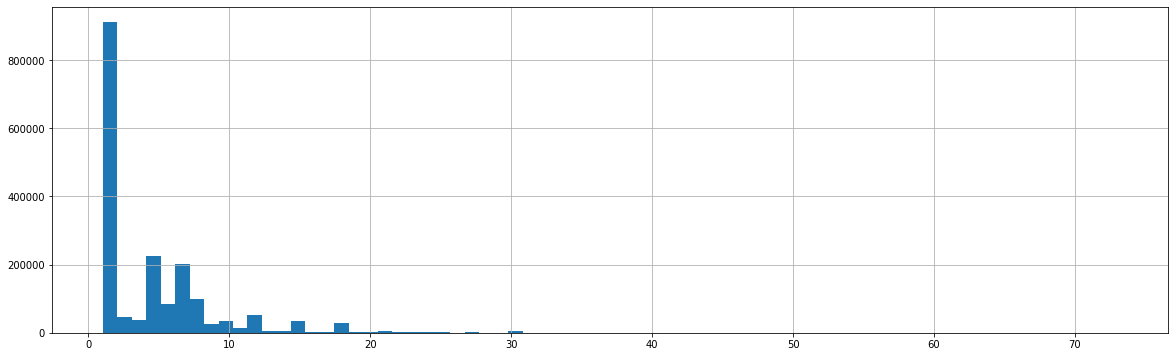

In [ ]:
# Number of words in each description

from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
Descriptions.length.hist(bins = 70)

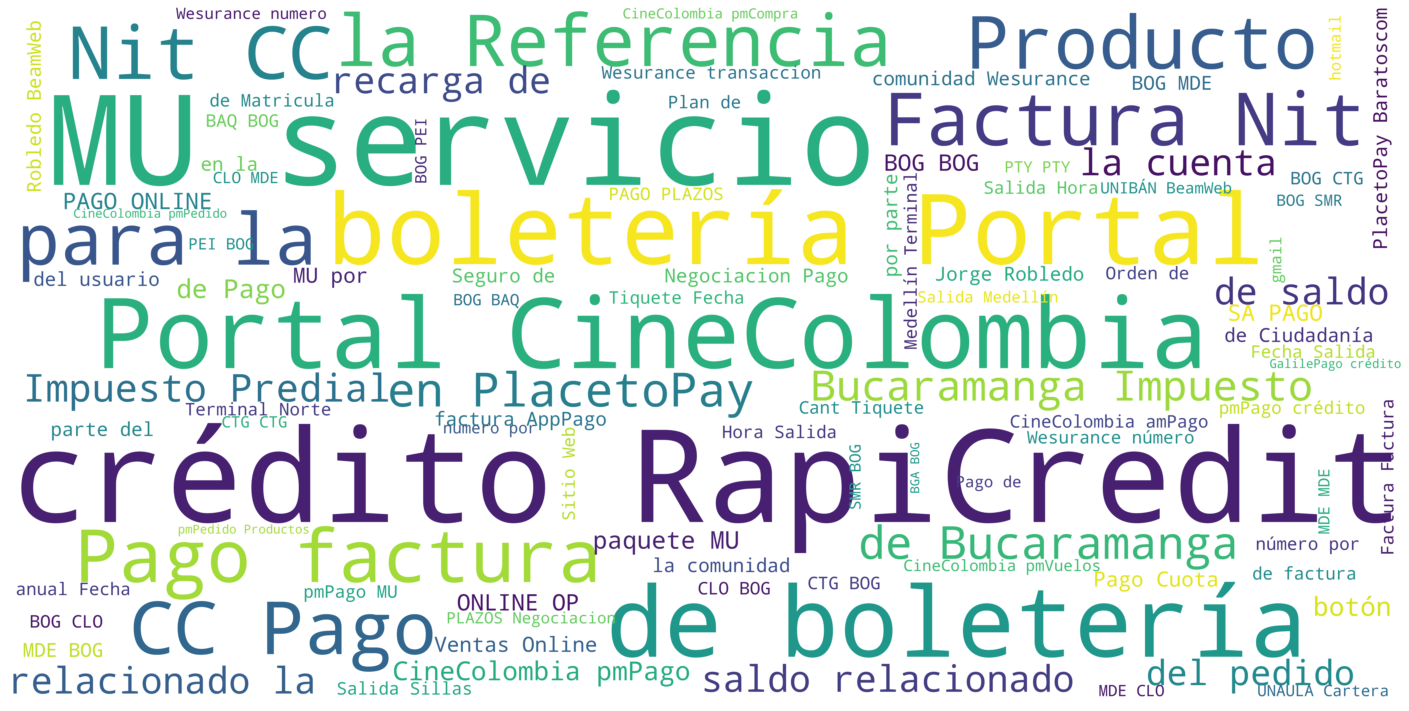

In [99]:
# Plotting wordclouds:

rcParams['figure.figsize'] = 25, 50

#joining all the words together
word_cloud_text = ''.join(Descriptions.Text)

# Creating a word cloud object
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)

# Plotting the generated word cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [105]:
from collections import Counter

all_descriptions_text = ' '.join(Descriptions.Text)
tokenized_words = nltk.word_tokenize(all_descriptions_text)
word_freq = Counter(tokenized_words)

len(word_freq)

1886037

In [ ]:
# Most frequent words

word_freq.most_common(100)

[('-', 537766),
 ('Pago', 421294),
 (':', 363174),
 ('No', 161804),
 ('de', 161480),
 ('a', 159518),
 ('.', 148061),
 ('(', 146096),
 (')', 145849),
 (',', 123339),
 ('MU', 117919),
 ('crédito', 108808),
 ('RapiCredit', 108783),
 ('servicio', 106157),
 (';', 94575),
 ('#', 92017),
 ('BOG', 87610),
 ('Vuelos', 86733),
 ('Portal', 83426),
 ('CineColombia', 83407),
 ('Compra', 65945),
 ('Pedido', 64238),
 ('pm', 63517),
 ('Productos', 63102),
 ('la', 58941),
 ('boletería', 58341),
 ("''", 41287),
 ('Factura', 38474),
 ('factura', 36388),
 ('en', 35791),
 ('Order', 35116),
 ('[', 33789),
 (']', 33781),
 ('Referencia', 32586),
 ('App', 32072),
 ('``', 32007),
 ('Nit/CC', 31859),
 ('para', 30857),
 ('PlacetoPay', 29238),
 ('del', 28231),
 ('MDE', 28163),
 ('50', 25933),
 ('Galile', 25337),
 ('@', 23907),
 ('52', 23887),
 ('Bucaramanga', 23342),
 ('Impuesto', 23251),
 ('Predial', 23249),
 ('Alcaldia', 23248),
 ('61', 22986),
 ('cuenta', 22202),
 ('saldo', 22041),
 ('Transacción', 21994),
 ('r

In [ ]:
# Least frequent words
word_freq.most_common()[-100:-1]

[('IONQGP', 1),
 ('5e9c6f99aeb9d', 1),
 ('2146726', 1),
 ('601833', 1),
 ('FWVPVE', 1),
 ('556688', 1),
 ('UZZOAC', 1),
 ('1140892409PLT', 1),
 ('76212221748', 1),
 ('JMGYRP', 1),
 ('76207678030', 1),
 ('1431317', 1),
 ('14484868', 1),
 ('5f3e96284ee1a', 1),
 ('278914', 1),
 ('1281938', 1),
 ('14369817', 1),
 ('06:05:17', 1),
 ('TBHD6Q', 1),
 ('5e5d0f2b63345', 1),
 ('14726273', 1),
 ('14389684', 1),
 ('5e88c287df957', 1),
 ('GJK864', 1),
 ('76209128028', 1),
 ('37747480-28920', 1),
 ('3491193', 1),
 ('KTNQ5V', 1),
 ('J27785', 1),
 ('1416120', 1),
 ('76217591700', 1),
 ('2020FGK19D', 1),
 ('33278657-31627', 1),
 ('76212350391', 1),
 ('76206660650', 1),
 ('14572804', 1),
 ('5e1cca8699557', 1),
 ('1517445', 1),
 ('1254564110234354', 1),
 ('76213405192', 1),
 ('WIIGRT', 1),
 ('1333212', 1),
 ('76203147603', 1),
 ('551379', 1),
 ('76207426600', 1),
 ('6052819', 1),
 ('6052850', 1),
 ('76212254864', 1),
 ('14385794', 1),
 ('5e25b2f53c0e4', 1),
 ('76216852132', 1),
 ('Ciudadanía:1045019163', 

In [73]:
# Creating a collection of words with all the words in the descriptions
tokens = nltk.word_tokenize(' '.join(Descriptions.Text))
len(set(tokens))

1886037

In [ ]:
# Filtering special characters
# WARNING: This will also replace accents
import re
Tokens2 = pd.Series(tokens).apply(lambda x: re.sub('[^A-Za-z]+', '', x))
Tokens2.value_counts().head(30)

                3797668
Pago             421296
No               162215
de               161481
a                159526
MU               117939
C                109301
crdito           108809
RapiCredit       108783
servicio         106157
BOG               87613
Vuelos            86733
Portal            83426
CineColombia      83407
Compra            65945
Pedido            64238
pm                63524
Productos         63102
la                58941
boletera          58341
Galile            44918
Factura           38482
factura           36388
en                35791
Order             35116
Referencia        32586
App               32072
NitCC             31859
para              30857
PlacetoPay        29238
dtype: int64

## Stopwords


In [109]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words("spanish"))
stop_words = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro'

In [ ]:
## Removing the stopwords
Tokens3 = pd.Series([each.lower() for each in Tokens2 if each.lower() not in stop_words and len(each.lower()) > 3])
print('words: ', len(Tokens3))
Tokens3.value_counts().head(30)

words:  3145782


pago            445433
crdito          115523
rapicredit      108783
servicio        106266
vuelos           86740
pedido           84466
portal           83439
cinecolombia     83407
factura          74888
compra           66154
productos        63109
boletera         58343
galile           44918
order            35116
referencia       32626
nitcc            31859
placetopay       29240
impuesto         24060
bucaramanga      23353
predial          23251
alcaldia         23248
cuenta           22248
saldo            22120
recarga          21996
transaccin       21995
relacionado      21991
online           19322
botn             15685
salida           14080
regular          12245
dtype: int64

In [ ]:
Tokens3.value_counts().head(100).tail(30)

anual           4519
aporte          4506
suscripcion     4441
plan            4430
andres          4398
seguro          4154
banco           3896
sitio           3642
rodriguez       3628
listo           3552
plazos          3546
norte           3529
virtual         3166
gomez           3119
programa        2949
cartera         2940
acuerdo         2920
teatro          2854
unaula          2831
numero          2765
david           2729
andrea          2728
colpatria       2719
unibn           2700
gonzalez        2699
carlos          2601
garcia          2563
galilegalile    2503
lopez           2459
ramirez         2443
dtype: int64

In [ ]:
Tokens3.value_counts().head(200).tail(30)

bolsas        1115
colombia      1109
assist        1106
alexander     1104
fernanda      1103
castro        1077
hotel         1072
herrera       1045
mancuernas    1041
ingls         1034
negro         1034
romero        1033
lola          1032
osorio        1029
mauricio      1026
montoya       1024
zapata        1019
marin         1015
mass          1013
suscripcin    1012
perfume       1012
tech          1010
lina          1000
claudia        993
suarez         990
paula          978
eduardo        976
quintero       975
delivery       971
ecommerce      961
dtype: int64

In [ ]:
Tokens3.value_counts().head(1000).tail(30)

bustos                155
platino               155
canin                 155
automotora            154
shampoo               154
reina                 154
rubiano               153
varela                153
gatos                 153
whisky                153
segurodecancecasae    152
evento                152
santos                152
burgos                152
cianuro               151
solicitud             151
mscara                151
homme                 151
hernndez              150
ballesteros           150
yuliana               150
fitness               150
festival              150
celis                 150
compadres             150
icfes                 149
pedraza               149
estampada             149
cigala                149
tomas                 149
dtype: int64

In [ ]:
Tokens3.value_counts().head(5000).tail(30)

just               18
socha              18
givenchy           18
edacb              18
nicoll             18
moschino           18
edeae              18
cacao              18
carmelo            18
ebcad              18
ebeee              18
effea              18
ebfbf              18
efbbc              18
sala               18
barrancabermeja    18
montezuma          18
eebba              18
reactivar          18
greet              18
ebdbd              18
meet               18
cuenca             18
oktuplus           18
termo              18
argumedo           18
ebabc              18
eccff              18
eabfe              18
cereza             18
dtype: int64

# Words in each section

K-ACTIVIDADES FINANCIERAS Y DE SEGUROS


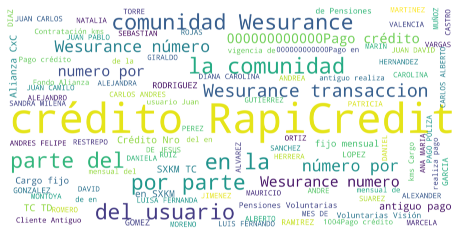

O-ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA


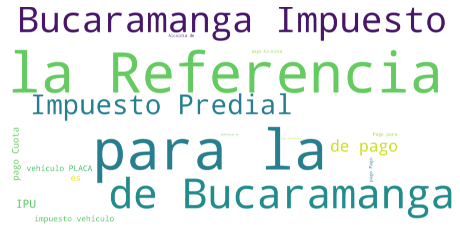

Q-ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL


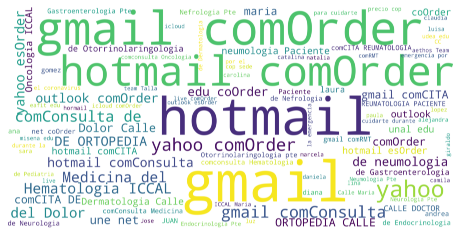

J-INFORMACIÓN Y COMUNICACIONES


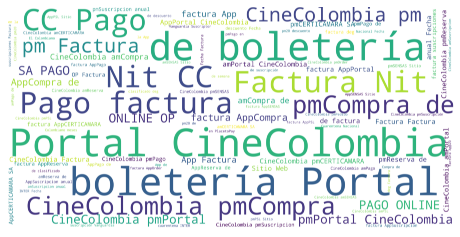

G-COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS


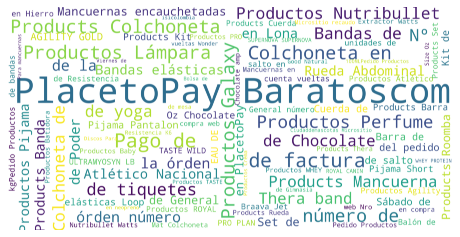

S-OTRAS ACTIVIDADES DE SERVICIOS


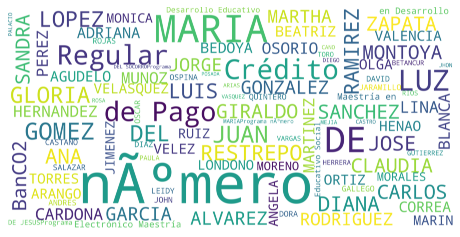

P-EDUCACIÓN


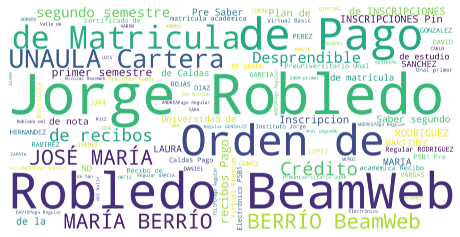

M-ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS


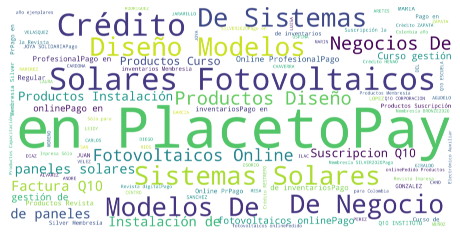

R-ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN


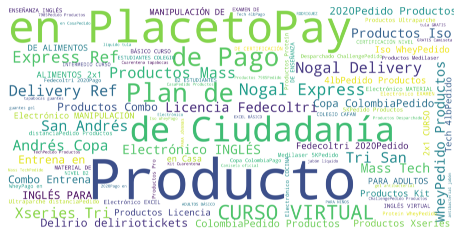

H-TRANSPORTE Y ALMACENAMIENTO


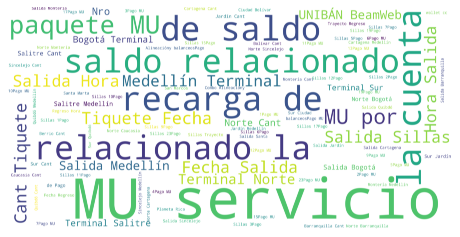

L-ACTIVIDADES INMOBILIARIAS


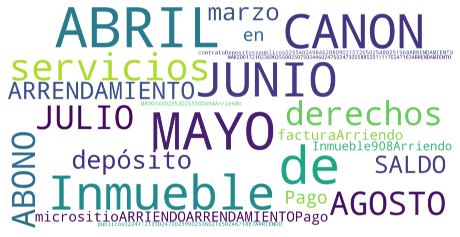

N-ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO


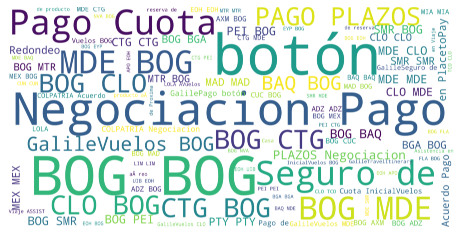

C-INDUSTRIAS MANUFACTURERAS


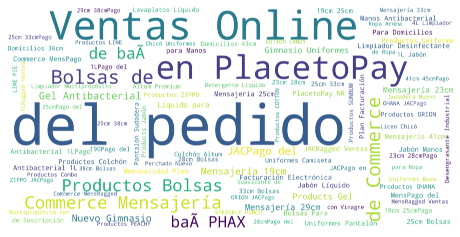

I-ALOJAMIENTO Y SERVICIOS DE COMIDA


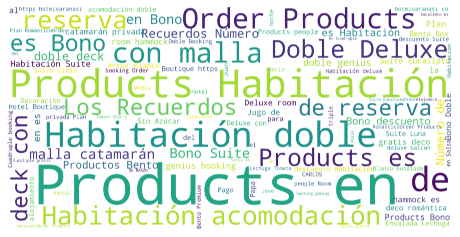

nan


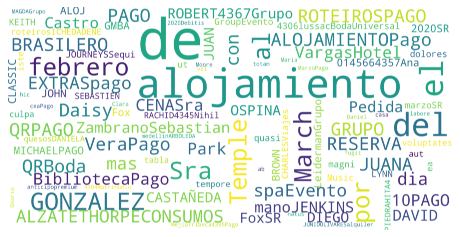

D-SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO


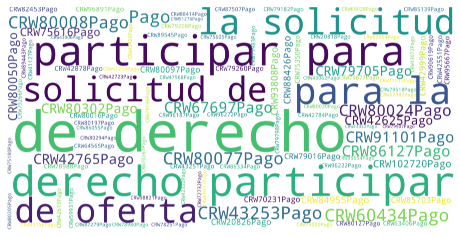

F-CONSTRUCCIÓN


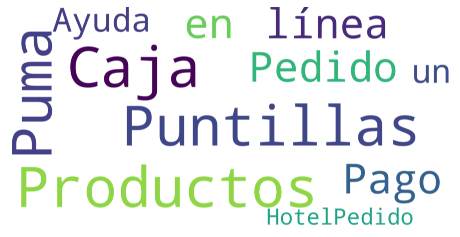

In [ ]:
# Plotting wordclouds:
for i, section in enumerate(Descriptions.isic_section_name.unique()):
  print(section)
  rcParams['figure.figsize'] = 8, 12

  #joining all the words together
  word_cloud_text = ''.join(Descriptions[Descriptions['isic_section_name']==section].Text)

  # Creating a word cloud object
  wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)

  # Plotting the generated word cloud
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [11]:
Descriptions[Descriptions.isic_section_name=='F-CONSTRUCCIÓN'].Text

290071     Pedido 161121 - Productos: Caja Puntillas Puma 2"
525937                        Pago en línea Ayuda a un Hotel
1635810    Pedido 161119 - Productos: Caja Puntillas Puma 2"
Name: Text, dtype: object

In [18]:
nltk.word_tokenize(' '.join(Descriptions[Descriptions.isic_section_name=='F-CONSTRUCCIÓN'].Text))

['Pedido',
 '161121',
 '-',
 'Productos',
 ':',
 'Caja',
 'Puntillas',
 'Puma',
 '2',
 "''",
 'Pago',
 'en',
 'línea',
 'Ayuda',
 'a',
 'un',
 'Hotel',
 'Pedido',
 '161119',
 '-',
 'Productos',
 ':',
 'Caja',
 'Puntillas',
 'Puma',
 '2',
 "''"]

In [21]:
import re

nltk.download('stopwords')
from nltk.corpus import stopwords

print(stopwords.words("spanish"))
stop_words = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', '

In [22]:
%%time

tokenLists = []
for i,section in enumerate(Descriptions.isic_section_name.unique()):
  Tokens1 = nltk.word_tokenize(' '.join(Descriptions[Descriptions.isic_section_name==section].Text))
  Tokens2 = pd.Series(Tokens1).apply(lambda x: re.sub('[^A-Za-z]+', '', x))
  Tokens3 = pd.Series([each.lower() for each in Tokens2 if each.lower() not in stop_words and len(each.lower()) > 3])
  print(i, section, len(Tokens1), len(Tokens2), len(Tokens3))
  tokenLists.append(Tokens3)
  

0 K-ACTIVIDADES FINANCIERAS Y DE SEGUROS 1284294 1284294 646419
1 O-ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA 1022633 1022633 189856
2 Q-ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL 215942 215942 80451
3 J-INFORMACIÓN Y COMUNICACIONES 1315405 1315405 503324
4 G-COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS 579701 579701 181823
5 S-OTRAS ACTIVIDADES DE SERVICIOS 36516 36516 26271
6 P-EDUCACIÓN 387813 387813 227470
7 M-ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS 43448 43448 20308
8 R-ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN 511114 511114 229275
9 H-TRANSPORTE Y ALMACENAMIENTO 971567 971567 524047
10 L-ACTIVIDADES INMOBILIARIAS 1046 1046 196
11 N-ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO 1882007 1882007 411517
12 C-INDUSTRIAS MANUFACTURERAS 212500 212500 97303
13 I-ALOJAMIENTO Y SERVICIOS DE COMIDA 13170 13170 6824
14 nan 0 0 0
15 D-SUMINISTRO DE ELEC

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



16 F-CONSTRUCCIÓN 27 27 14
CPU times: user 1min 5s, sys: 777 ms, total: 1min 6s
Wall time: 1min 6s


In [83]:
TokenList2 = []
for i,section in enumerate(Descriptions.isic_section_name.unique()):
  print(section, ' No. of Words: ',len(tokenLists[i]))
  print(list(Counter(tokenLists[i]))[:10])
  TokenList2.append(list(Counter(tokenLists[i]))[:10])

K-ACTIVIDADES FINANCIERAS Y DE SEGUROS  No. of Words:  646419
['pago', 'polizas', 'financiadas', 'seguros', 'vida', 'soat', 'mapfre', 'colombia', 'cuota', 'moderadora']
O-ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA  No. of Words:  189856
['pago', 'impuesto', 'vehicular', 'predial', 'multas', 'trnsito', 'cuota', 'acuerdo', 'valorizacin', 'poblado']
Q-ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL  No. of Words:  80451
['pago', 'servicios', 'colpatria', 'loteria', 'lottired', 'cobros', 'tokenizad', 'emermdica', 'compra', 'linea']
J-INFORMACIÓN Y COMUNICACIONES  No. of Words:  503324
['pagos', 'miavantel', 'facturasptp', 'recarga', 'tarjeta', 'cineco', 'pago', 'factura', 'compra', 'soluciones']
G-COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS  No. of Words:  181823
['mercadolibre', 'mercadopago', 'pago', 'fruto', 'salvaje', 'compra', 'tarjeta', 'regalo', 'mercados', 'colombia']
S-OTRAS 

In [34]:
list(Counter(tokenLists[13]))[:10]

['pago',
 'placetopay',
 'alojamiento',
 'defam',
 'membership',
 'february',
 'reserva',
 'servicios',
 'turismo',
 'restauracin']

In [78]:
list(Counter(tokenLists[i]))[:10]

['pedido',
 'productos',
 'caja',
 'puntillas',
 'puma',
 'pago',
 'lnea',
 'ayuda',
 'hotel']

In [87]:
# Creating a collection of words with all the words in the descriptions
TokenList3 = []
[TokenList3.append(item) for sublist in TokenList2 for item in sublist if item not in TokenList3]
#[y for x in TokenList2 for y in x]\
TokenList3

['pago',
 'polizas',
 'financiadas',
 'seguros',
 'vida',
 'soat',
 'mapfre',
 'colombia',
 'cuota',
 'moderadora',
 'impuesto',
 'vehicular',
 'predial',
 'multas',
 'trnsito',
 'acuerdo',
 'valorizacin',
 'poblado',
 'servicios',
 'colpatria',
 'loteria',
 'lottired',
 'cobros',
 'tokenizad',
 'emermdica',
 'compra',
 'linea',
 'pagos',
 'miavantel',
 'facturasptp',
 'recarga',
 'tarjeta',
 'cineco',
 'factura',
 'soluciones',
 'mercadolibre',
 'mercadopago',
 'fruto',
 'salvaje',
 'regalo',
 'mercados',
 'certificadosvirtuales',
 'renovacionmatricula',
 'certificados',
 'placetopay',
 'matriculapnat',
 'mutacionregmer',
 'inscripciondocumentos',
 'donacin',
 'payment',
 'orden',
 'matrcula',
 'virtual',
 'liceo',
 'recibo',
 'matriculapregrado',
 'operaciones',
 'inscripcin',
 'evento',
 'media',
 'maraton',
 'bluma',
 'pelpago',
 'token',
 'salud',
 'mensualliveco',
 'apostar',
 'sitio',
 'reserva',
 'garmin',
 'cupo',
 'areo',
 'microsite',
 'transaccin',
 'saldo',
 'micrositio',


In [42]:
TokenList3 = [, 'soat','moderadora', 
              'impuesto', 'vehicular', 'predial', 'multas', 'valorizacin', 
              'loteria', 'miavantel', 'recarga', 'cineco', 
              'mercadolibre', 'fruto', 'regalo', 
              'matricula', 'matrcula' , 'certificados', 
              'evento', 'maraton', 'salud', 'apostar', 'garmin',
              'circo', 'tintesiris', 
              'alojamiento','turismo']

#Eliminadas: 'polizas', 'vida',  'mercados', 'february'           

# Time Series!

In [11]:
bd.drop(bd[bd['transaction_response_code']!='APPROVED'].index, inplace = True)

In [12]:
bd.shape

(6677199, 9)

In [33]:
bd['week'] = pd.DatetimeIndex(bd['transaction_processing_date_']).week
bd['month'] = pd.DatetimeIndex(bd['transaction_processing_date_']).month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [126]:
bd_plot = bd[bd['transaction_description'].str.contains(r'maraton',case=False, na=False)].groupby(by=['week'],as_index=False)["transaction_processing_amount"].count()
fig = px.line(bd_plot, x="week", y="transaction_processing_amount",
            labels={"transaction_processing_amount":"No of transactions", "week":"Week"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"}
                  )
fig.show()

In [124]:
bd_plot = bd[bd['transaction_description'].str.contains(r'garmin',case=False, na=False)].groupby(by=['transaction_processing_date_'],as_index=False)["transaction_processing_amount"].count()
fig = px.line(bd_plot, x="transaction_processing_date_", y="transaction_processing_amount",
            labels={"transaction_processing_amount":"No. of transactions", "transaction_processing_date_":"Date"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"}
                  )
fig.show()

In [41]:
bd_plot = bd[bd['transaction_description'].str.contains(r'garmin',case=False, na=False)].groupby(by=['transaction_processing_date_'],as_index=False)["transaction_processing_amount"].sum()
fig = px.line(bd_plot, x="transaction_processing_date_", y="transaction_processing_amount",
            labels={"transaction_processing_amount":"Aggregated Amount of transactions", "transaction_processing_date_":"Date"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
fig.show()

In [120]:
# first try: DIDNT WORK
for Keyword in TokenList3:
  bd_plot = bd[bd['transaction_description'].str.contains(Keyword,case=False, na=False)].groupby(by=['week'],as_index=False)["transaction_processing_amount"].sum()
  fig = px.line(bd_plot, x="week", y="transaction_processing_amount",
            labels={"transaction_processing_amount":"Aggregated Amount of transactions", "week":"Date"})
  fig.update_traces(mode="markers+lines")
  fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
  print(Keyword, len(bd_plot))
fig.show()


polizas 45
vida 45
soat 45
moderadora 45
impuesto 45
vehicular 45
predial 45
multas 45
valorizacin 45
loteria 42
miavantel 43
recarga 45
cineco 38
mercadolibre 45
fruto 45
regalo 44
mercados 36
matricula 45
matricula 45
certificados 45
evento 43
maraton 38
salud 45
apostar 45
garmin 45
circo 32
hermanos 16
gasca 43
www.tintesiris.com 0
alojamiento 38
february 11
turismo 24


In [43]:
def Clean_chars(Name): 
    Name = str(Name)
    Name = re.sub('[^a-zA-Z0-9? ]','',Name).lower()
    for keyword in TokenList3:
      if re.search(keyword, Name):
        Name = keyword
    if Name not in TokenList3:
      Name = np.nan
    return Name

In [46]:
bd['Keyword'] = bd['transaction_description'].apply(Clean_chars)
bd['Keyword'].value_counts().head(30)

impuesto        632072
polizas         604798
vida            415126
soat            261098
loteria         205290
moderadora      164206
recarga         116102
certificados     94397
mercadolibre     84897
miavantel        83702
cineco           82159
multas           60377
valorizacin      41846
matricula        41362
predial          34720
matrcula         21433
fruto            13334
regalo           12952
salud            12355
garmin            9632
apostar           4899
circo             4467
tintesiris        3031
evento            1551
alojamiento        335
turismo            116
Name: Keyword, dtype: int64

In [48]:
# Number of transactions, aggregated by day, for the interesting keywords.

bd_plot = bd.drop(bd[bd['Keyword'].isna()].index).groupby(by=["Keyword", 'transaction_processing_date_'],as_index=False)["transaction_processing_amount"].count()
fig = px.line(bd_plot, x="transaction_processing_date_", y="transaction_processing_amount", color = 'Keyword',
          labels={"transaction_processing_amount":"No. of transactions", "transaction_processing_date_":"Date"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
fig.show()

In [50]:
# Number of transactions, aggregated by weeks, for the interesting keywords.

bd_plot = bd.drop(bd[bd['Keyword'].isna()].index).groupby(by=["Keyword", 'week'],as_index=False)["transaction_processing_amount"].count()
fig = px.line(bd_plot, x="week", y="transaction_processing_amount", color = 'Keyword',
          labels={"transaction_processing_amount":"No. of transactions", "week":"Week"})
fig.update_traces(mode="markers+lines")
fig.update_layout({"margin":{"t":25,"l":50},"legend_orientation":"h"})
fig.show()

# Save Text analisys table


In [6]:
cd '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks'

/content/drive/.shortcut-targets-by-id/10MASVkGpMyb9HT3ebm8hX6hVuck-_WDW/Place to pay - DS4A


In [7]:
ls

 1-Documentos/                    payers_cluster.csv
'2-Deliverable Documents Sent'/   payers.csv
'3- Notebooks'/                   payers.ftr
'4 - Presentaciones'/             payers.gsheet
 bdfnv2.csv                       placetopayDB4.csv
 deanonimized_documents.csv       placetopayDB4.ftr
 mechants_clustering.csv          placetopayDB4_pickle
 merchants_cluster.csv            placetopayDB4_sample.csv
 merchants.csv                    placetopayDB4_sample.ftr
 merchants.ftr                    transaction_descriptions.csv
 merchants.gsheet


In [95]:
%%time
Descriptions.to_csv('transaction_descriptions.csv', header=True, index=False)

CPU times: user 13.3 s, sys: 693 ms, total: 14 s
Wall time: 16 s


In [ ]:
%%time
tokenLists.to_csv('word_tokens.csv', header=True, index=False)

In [40]:
# $ pip install feather-format
import feather

In [ ]:
%%time

feather.write_dataframe(Descriptions, "./transaction_descriptions.ftr")
#bd.to_feather(FilePath) # do the same, alternatively

CPU times: user 3.65 ms, sys: 6 µs, total: 3.66 ms
Wall time: 11.3 ms


In [ ]:
feather.write_dataframe(tokenLists, "./word_tokens.ftr")
#bd.to_feather(FilePath) # do the same, alternatively

In [ ]:
# to restart working:

Descriptions = pd.read_csv('transaction_descriptions.csv')
Tokens = pd.read_csv('word_tokens.csv')

In [10]:
Descriptions.columns

Index(['Text', 'No_of_transactions', 'No of Merchants', 'No of Payers',
       'Tokenized', 'length', 'isic_section_name', 'isic_division_name'],
      dtype='object')